In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
import torchvision
import torchvision.transforms as transforms
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [3]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [4]:
train_data = torchvision.datasets.CIFAR10(root='./data',train = True , transform=transform , download=True)
test_data = torchvision.datasets.CIFAR10(root='./data' , train=True , transform = transform, download=True)

Train_loader = torch.utils.data.DataLoader(dataset=train_data , shuffle = True , batch_size = 10)
Test_loader = torch.utils.data.DataLoader(dataset=test_data , batch_size = 10)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

cat


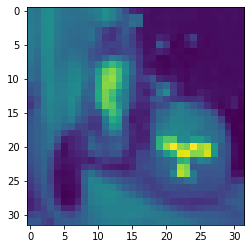

In [6]:
#example 
example = iter(Train_loader)
image,label = example.next() 
plt.imshow(image[0][0])   #normalized images
print(classes[label[0]])

In [7]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3,32,3)    #input_channels , output_channels , kernel_size(filter_size) , padding = 0 and stride = 1 as default   (30,30,32)
    self.Pool1 = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32,64,3)  #output_chanels , outputs_channels2                 
    self.linear1 = nn.Linear(64*13*13,64)    #64 neurons and flatten              
    self.linear2 = nn.Linear(64,32)
    self.linear3 = nn.Linear(32,10)
    self.dropout1 = nn.Dropout(p=0.5)
    self.dropout2 = nn.Dropout(p=0.2)
  
  def forward(self,x):
    out = self.conv1(x)          
    out = F.relu(out) 
    out = self.Pool1(out)
    out = self.conv2(out)
    out = F.relu(out) 
    out = out.view(10,64*13*13)  #Flatten
    out = self.dropout1(out)
    out = self.linear1(out)
    out = F.relu(out)
    out = self.dropout2(out)
    out = self.linear2(out)
    out = F.relu(out)
    out = self.linear3(out)  
    return out

In [8]:
model = ConvNet().to(device)

In [9]:
#model config
Learning_rate = 0.001
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=Learning_rate)

In [11]:
#Training
epochs = 10
for epoch in range(epochs) : 
  for i, (image , labels) in enumerate(Train_loader):
    image =image.to(device)
    labels =labels.to(device)
    #forward 
    output = model(image)
    loss = Loss(output, labels)
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'epoch {epoch}/{epochs}      step : {i+1}/{len(Train_loader)}         loss: {loss.item():.4f}  ')


epoch0/10      step : 5000/5000         loss: 0.9610  
epoch1/10      step : 5000/5000         loss: 0.7624  
epoch2/10      step : 5000/5000         loss: 0.8117  
epoch3/10      step : 5000/5000         loss: 2.1663  
epoch4/10      step : 5000/5000         loss: 1.1731  
epoch5/10      step : 5000/5000         loss: 1.4706  
epoch6/10      step : 5000/5000         loss: 1.0772  
epoch7/10      step : 5000/5000         loss: 0.9146  
epoch8/10      step : 5000/5000         loss: 0.5046  
epoch9/10      step : 5000/5000         loss: 0.6792  


In [12]:
#evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in Test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(4):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 68.544 %
Accuracy of plane: 67.2663668165917 %
Accuracy of car: 81.71545968156137 %
Accuracy of bird: 61.113849186791526 %
Accuracy of cat: 45.579567779960705 %
Accuracy of deer: 73.99598393574297 %
Accuracy of dog: 48.22557122022363 %
Accuracy of frog: 68.02383316782522 %
Accuracy of horse: 71.79752066115702 %
Accuracy of ship: 87.72018117765475 %
Accuracy of truck: 80.20989505247377 %


In [14]:
#another method for evaluation 
j=0
l=0
i=0
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in Test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        for i in range(10) : 
           if predicted[i] != labels[i] : 
              l+=1
          
    

print(f' number of wrong predictions: {l}        accuracy: {1-(l/n_samples)}')

 number of wrong predictions: 15677        accuracy: 0.6864600000000001


In [ ]:
#we see that the accauracy decreased because of adding dropout, so we don't need to use, but this is just an example to show how to use it and the effect of dropout on the accuracy of the model 
#this is a test of dropout on my neural network,partically using dropout out is to avoid overfitting problem
#i use this website for calculating the convolution layers output sizes https://madebyollin.github.io/convnet-calculator/ 